# **0. Table of Content**

1. [마르코프 모델](#1.-마르코프_모델-(Markov-Model,-MM-이란)
2. [은닉 마르코프 모델](#2.-은닉-마르코프-모델-(Hidden-Markov-Model,-HMM))  
    2-1. [HMM의 구조](#2-1.-HMM의-구조)  
    2-2. [HMM의 동작](#2-2.-HMM의-동작)  
    (1) [Forward Algorithm](#(1)-Forward-algorithm)
99. [참고 자료](#99.-참고자료)
***
# **1. 마르코프 모델<sup>[[1]](#footnote_1)</sup>이란**

- 마르코프 체인 (Markov Chain, MC)이라고도 하며 마르코프 성질(Markov Property)을 가진 이산확률과정(discrete-time stochastic process)를 의미한다.

    > 1. 이산 확률 과정 (discrete-time stochastic process)  
         시간이 연속적으로 변하지 않고 이산적으로 변하며, 이에 따라 특정 상태가 발생할 확률이 변화하는 과정
    > 2. 마르코프 성질 (Markov Property)   
         미래의 상태는 오직 현재의  상태 혹은 더 이전의 일정기간에만 영향을 받는다고 가정  
         즉, 미래의 어떤 상태를 예측하기 위해 과거의 긴 이력을 필요로 하지 않는 성질(memoryless)
        
- 마르코프 모델이 바로 이전상태만 고려하는 확률식은 아래와 같다.
> $P({o}_{t}|{o}_{1},...,{o}_{t-1}) = P({o}_{1}|{o}_{t -1})$  
- 바로 이전 상태(r = 1) 혹은 더 이전 상태(r = 2)까지 고려한다고 했을 때, r차 마르코프 모델은 아래처럼 표현할 수 있다.  
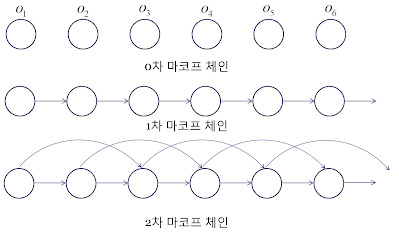
***

# **2. 은닉 마르코프 모델 <sup>[[2]](#footnote_2)</sup>이란**
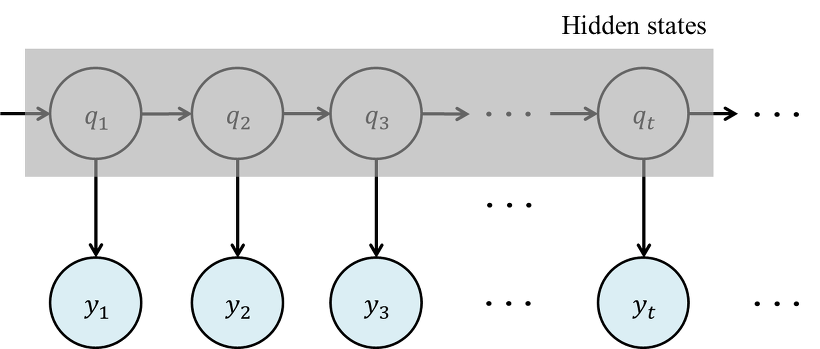
- 마르코프 모델에 은닉된 state와 직접적으로 확인 가능한 Observation을 추가하여 확장한 것이다.
- HMM을 이용하여 풀고자 하는 문제는 관축 가능한 y_t가 q_t에 종속적으로 발생한다고 할때,  
  y_t의 sequence를 이용하여 q_t의 sequence를 추론하는 것이다.

## **2-1. HMM의 구조**
- HMM은 **<Q, Y, $\pi$, A, B>** 라는 튜플로 정의되며, 각각의 요소가 의미하는 내용은 아래 표로 정리해두었다.

|인자 값|구성 성분|설명|
|:--|:--|:--|
|Q|{q1, q2, ..., q_N}|은닉된 state들의 집합|
|Y|{y1, y2, ..., y_M}|은닉된 state에서 발생할 수 있는 observation들의 집합|
|$\pi$|**R^N**|초기 state가 qi일 확률을 나타내는 initial probability p(q_i)의 집합|
|A|**R^(N x N)**|q_i에서 q_j로 이동할 확률을 나타내는 transition probability p(q_j\|q_i)의 집합|
|B|**R^(N x M)**|q_i에서 y_j가 발생할 확률을 나타내는 emission probability p(y_j\|q_i)의 집합|


🌱 **e.g.)**  
  주어진 정보가 어떤 사람의 식단이라고 가정하고, 알아내고자 하는 정보를 누구(친구, 가족, 회사 동료)와 먹었는가라고 해보자.   
  이 때 **Q = {친구, 가족, 회사 동료}** , **Y = {국밥, 고등어조림, 치킨, 피자, 파스타}** 로 정의하고,  
  initial probability **$\pi$** 와 **T**, **E**가 아래 두 표 처럼 추정되었다고 해보자.  
  
  1) Transition Probabilities (전이 확률 / A)
  
  ||친구|가족|회사 동료|
  |:--|:--|:--|:--|
  | **$\pi$** |0.3|0.4|0.3|
  |친구|0.4|0.4|0.2|
  |가족|0.2|0.45|0.35|
  |회사 동료|0.3|0.5|0.2|
  
  - 이 표를 통해 이 사람의 식사 패턴을 분석해 볼 수 있다.  
    예를 들면, 이전 식사를 가족과 함께하고, 이번 식사를 회사 동료와 함께할 확률은 35%이고,  
    이전 식사를 회사 동료와 함께하고, 이번 식사를 친구와 함께할 확률은 30%이다.
  
  2) Emission Probabilities (방출확률 / B)
  
  ||국밥|고등어 조림|치킨|피자|파스타|
  |:--|:--|:--|:--|:--|:--|
  |친구|0.05|0.025|0.625|0.2|0.1|
  |가족|0.1|0.4|0.3|0.1|0.1|
  |회사 동료|0.5|0.3|0.1|0.05|0.05|
  
  - 이 표를 통해서는 이 사람이 누구와 식사를 하느냐에 따라 메뉴를 선택하는 패턴을 분석해 볼 수 있다.  
    예를 들면, 친구와 만났을때는 고등어 조림을 2.5%의 확률로 먹으러 가고, 회사 동료와는 50% 확률로 국밥을 먹으러 간다.
    
## **2-2. HMM의 동작**
- 위의 예시처럼 테이블이 주어졌을 때, HMM을 이용하여 두 가지 사항을 추론할 수 있다.  
   > 1. 국밥 → 피자 → 고등어 조림 순으로 하루 세끼를 먹었을 확률 계산
   > 2. 국밥 → 피자 → 고등어 조림 순으로 하루 세끼를 먹었을 때, 각 끼니마다 누구와 식사했을지에 대한 추론 
- 위의 두가지 추론은 HMM을 이용하여 조건부 확률(Conditional Probability)를 계산하는 것과 같다.
- HMM을 구현할 때는 세 가지를 문제를 풀기 위한 연산을 고려해야 한다.
   > 1. HMM의 파리미터가 주어졌을 때, 주어진 Observation이 나타날 확률 계산
   > 2. HMM의 파라미터가 주어졌을 때, 주어진 Observation이 나타날 확률이 가장 높은 state의 나열을 계산
   > 3. 학습 데이터로부터 HMM의 파라미터 $\theta\;=\;\{\pi, A, B\}$학습  
   > ⚠️ 1, 2번 문제는 각각 Dynamic Programming 기반의 forward algorithm과 Viterbi algorithm으로 해결할 수 있다.  
    &nbsp;&nbsp;&nbsp;&nbsp;3번에 해당하는 HMM의 파라미터를 학습시키는 문제는 주로 EM algorithm<sup>[[3]](#footnote_3)</sup>의 한 형태인 Baum-Welch Algorithm으로 해결한다.
  

### **(1) Forward algorithm**
- HMM의 모든 파라미터가 결정되었을 때, 주어진 observation O = o<sub>1</sub>,o<sub>2</sub>, ..., o<sub>T</sub>가 관측될 확률 P(O\|$\theta$)를 계산하는 것이다.  
  (i) o<sub>1</sub>이 나타날 확률은 다음과 같이 계산된다.  
  > $p({o}_{1}|\theta)\;=\;\sum_{{i}_{1}}p(q_{{i}_{1}})p(o_1|q_{i_1})$
  
  (ii) o<sub>1</sub>과 o<sub>2</sub>가 연속해서 일어날 확률은 다음과 같이 계산된다.
  > $p(o_1, o_2|\theta)\;=\;\sum_{i_1}p(q_{{i}_{1}})p(o_1|q_{i_1})\sum_{i_2}p(q_{i_2}|q_{{i}_{1}})p(o_2|q_{i_2})\;=\;\sum_{i_1}\sum_{i_2}p(q_{{i}_{1}})p(o_1|q_{i_1})p(q_{i_2}|q_{{i}_{1}})p(o_2|q_{i_2})$
  
  (iii) 시간 T까지의 Observation O가 나타날 확률은 다음과 같다.
  > $p(O|\theta)\;=\;\sum_{i_1}\sum_{i_2}...\sum_{i_T}p(q_{{i}_{1}})p(o_1|q_{i_1})p(q_{i_2}|q_{{i}_{1}})p(o_2|q_{i_2})...p(q_{{i}_{T}}|q_{i_{T-1}})p(o_T|q_{i_{T}})$
  
  ⚠️ 마지막 (iii)을 계산하는 것은 시간 복잡도 측면에서 O(2TN<sup>T</sup>)이라는 막대한 자원을 요구하여 HMM은 O(TN<sup>2</sup>)의 시간 복잡도를 갖는 forward algorithm을 이용한다.
- forward algorithm에서는 새로운 변수 $\alpha_t(q_j)$를 새로 정의하는데, 이를 모델 $\theta$가 주어졌을 때 $q_j$번째 상태와 o<sub>1</sub>, ... ,o<sub>T</sub>가   나타날 전방확률<sup>[[4]](#footnote_4)</sup>이라한다.
  > $\alpha_t(q_j)\;=\;p(o_1, o_2, ... , o_t, s_t = q_j | \theta)\;=\;\sum^{N}_{i=1}\alpha_{t-1}(q_i)p(q_j|q_i)p(o_t|q_j)$
  

# **99. 참고자료**
## **99-1. 도서**
## **99-2. 논문, 학술지**
## **99-3. 웹 사이트**
- yg's blog : [ML] 은닉 마르코프 모델 (Hidden Markov Model, HMM) | [[블로그 링크]](https://yganalyst.github.io/ml/hmm/)
- ratsgo's blog : 은닉마르코프모델 (Hidden Markov Models) | [[블로그 링크]](https://ratsgo.github.io/machine%20learning/2017/03/18/HMMs/)
- Untitled : [머신 러닝] - 은닉 마르코프 모델 (Hidden Markov Model, HMM) | [[블로그 링크]](https://untitledtblog.tistory.com/97)

## **99-4. 데이터셋 출처**

## **99-5. 각주**
<a name="footnote_1">[1]</a> Markov Model  
<a name="footnote_2">[2]</a> Hidden Markov Model  
<a name="footnote_3">[3]</a> Expectation-Maximization algorithm  
<a name="footnote_4">[4]</a> forward probability